# Project Results

Hello! This notebook has code that loads the saved q-table and prints on the terminal. You can use this notebook to check the best trained agent's q-value here. Training process on cloud continues, so time to time I will commit better policy file if comes-up. Let me explain how to intreperet the table. The columns shows the upcard of the dealer. And the rows shows the players total. There is two different types of table cascading one another. First one shows the states that player has no ace card in hand or has ace and used the card as 1 because the total is over 21. The other table shows the totals but playuer has a usable ace that can be changed to 1 if the player exeeds 21. As yoou look deeper on the table you will see tthat every coulmn has 2 sub columns. For each coulmn first sub column represent the q-value of taking the stand action and the second one is hit action.

In [4]:
import numpy as np
import pickle

fr = open('policy', 'rb')
q_table = pickle.load(fr)
fr.close()        

_sign = lambda x: x and (1, -1)[x<0]

def toNumpy(usable_ace = False):
    d = np.zeros((22,12,2))
    for state,alist in q_table.items():
        if(state[0] > 21):
            continue
        if(state[1] > 11):
            continue
        if(state[2] != usable_ace):
            continue
        d[state[0]][state[1]][0] = alist[0]
        d[state[0]][state[1]][1] = alist[1]
    return d

def printQTable(d):
    print("---------------------------------------------------------------------------------------------------------------------------")
    print("  |     2     |     3     |     4     |     5     |     6     |     7     |     8     |     9     |    10     |     A     |")
    for i in range(1,22):
        print("%02d|"%i, end="")
        for j in range(2,12):
            if _sign(d[i][j][0]) == 1:
                print("\x1b[1;32;40m%05.2f\x1b[0m"%d[i][j][0],end="-")
            if _sign(d[i][j][0]) == -1:
                print("\x1b[1;31;40m%05.2f\x1b[0m"%abs(d[i][j][0]),end="-")
            if(d[i][j][0] == 0):
                print("\x1b[1;33;40m%05.2f\x1b[0m"%abs(d[i][j][0]),end="-")
            if _sign(d[i][j][1]) == 1:
                print("\x1b[6;32;47m%05.2f\x1b[0m"%d[i][j][1],end="|")
            if _sign(d[i][j][1]) == -1:
                print("\x1b[6;31;47m%05.2f\x1b[0m"%abs(d[i][j][1]),end="|")
            if(d[i][j][1] == 0):
                print("\x1b[6;33;47m%05.2f\x1b[0m"%abs(d[i][j][1]),end="|")

        print("")
    print("---------------------------------------------------------------------------------------------------------------------------")
    print("---------------------------------------------------------------------------------------------------------------------------")
    print("")

d = toNumpy(False)
print("No Usable Ace")
printQTable(d)
d = toNumpy(True)
print("Has Usable Ace")
printQTable(d)

No Usable Ace
---------------------------------------------------------------------------------------------------------------------------
  |     2     |     3     |     4     |     5     |     6     |     7     |     8     |     9     |    10     |     A     |
01|00.00-00.00|00.00-00.00|00.00-00.00|00.00-00.00|00.00-00.00|00.00-00.00|00.00-00.00|00.00-00.00|00.00-00.00|00.00-00.00|
02|00.00-00.00|00.00-00.00|00.00-00.00|00.00-00.00|00.00-00.00|00.00-00.00|00.00-00.00|00.00-00.00|00.00-00.00|00.00-00.00|
03|00.00-00.00|00.00-00.00|00.00-00.00|00.00-00.00|00.00-00.00|00.00-00.00|00.00-00.00|00.00-00.00|00.00-00.00|00.00-00.00|
04|00.03-00.11|00.03-00.13|00.03-00.20|00.02-00.17|00.02-00.28|00.01-00.35|00.02-00.32|00.01-00.20|00.06-00.01|00.23-00.16|
05|00.07-00.09|00.07-00.09|00.06-00.15|00.03-00.12|00.03-00.25|00.03-00.33|00.03-00.30|00.03-00.17|00.09-00.04|00.27-00.22|
06|00.08-00.04|00.09-00.01|00.08-00.11|00.04-00.07|00.05-00.17|00.03-00.21|00.07-00.24|00.06-00.13|00.18-00.09|00.29-0


### Same Results with Matplotlib

You can view the same results below. I hoping to show the result with better graphics using matplotlib library.

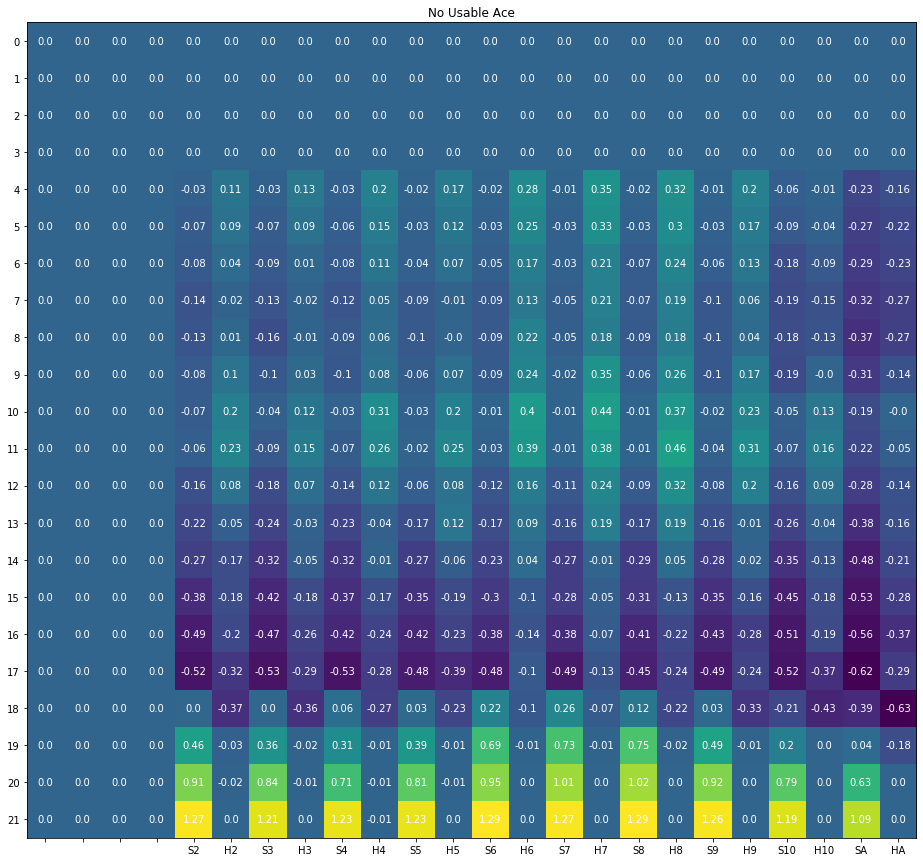

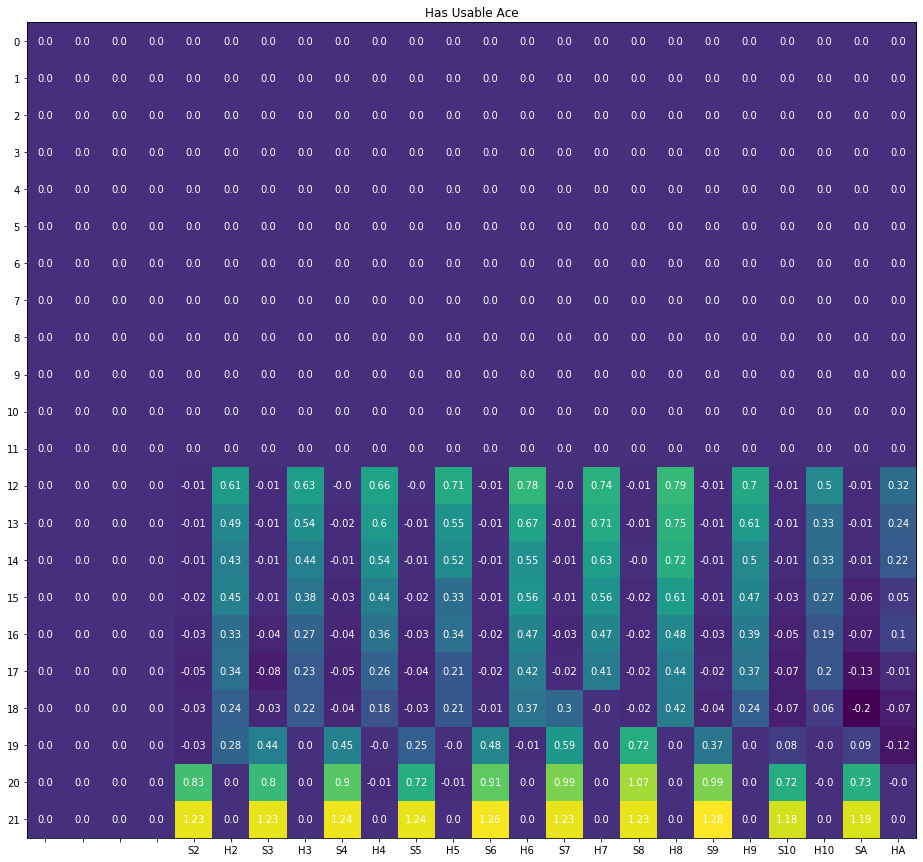

In [3]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

fr = open('policy', 'rb')
q_table = pickle.load(fr)
fr.close()        

def toNumPy(usable_ace = False):
    d3 = np.zeros((22,24))
    for state,alist in q_table.items():
        if(state[0] > 21 or state[1] > 11 or state[2] != usable_ace):
            continue
        d3[state[0]][state[1]*2] = alist[0]
        d3[state[0]][state[1]*2+1] = alist[1]
    return d3


def plot(title="No Usable Ace",usable_ace = False):
    d3 = toNumPy(usable_ace)
    fig1, ax1 = plt.subplots(figsize=(30,15))
    plt.title(title)
    im1 = ax1.imshow(d3)

    # We want to show all ticks...
    ax1.set_xticks(np.arange(24))
    ax1.set_yticks(np.arange(22))

    ax1.set_xticklabels(["","","","","S2","H2","S3","H3","S4","H4","S5","H5","S6","H6","S7","H7","S8","H8","S9","H9","S10","H10","SA","HA"])

    for i in range(len(d3)):
        for j in range(len(d3[i])):
            text = ax1.text(j, i, round(d3[i, j],2),
                        ha="center", va="center", color="w")

    plt.show()

plot(title="No Usable Ace",usable_ace = False)
plot(title="Has Usable Ace",usable_ace = True)